<a href="https://colab.research.google.com/github/naorJR/IP-Labs/blob/ortra/Lab%206/ex6_pre_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Mount to your drive by the left menu or by running this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2. Change Directory to file location in the drive
%cd '/content/drive/My Drive/IP Labs/6'


/content/drive/My Drive/IP Labs/6


In [87]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pylab as plt
from skimage import transform,io,color,img_as_ubyte
from sklearn import cluster
from skimage.transform import resize,rescale,rotate
from sklearn.utils import shuffle
from skimage.util import img_as_float32
from numpy import fft
from numpy import random
from numpy.core.numeric import zeros_like
from scipy.fftpack import dct
from scipy.fft import fft

# Preliminary Report - Question 3

In [131]:
N = 16
x = np.sort(np.random.rand(N))

In [88]:
def my_dct(x):
  N = len(x)

  n, k = np.meshgrid(range(N), range(N))
  arg = k*np.pi*(2*n+1)/(2*N)
  cos_mat = np.cos(arg)
  y = 2*x @ cos_mat.T
  y[0] = y[0]/np.sqrt(4*N)
  y[1:] = y[1:]/np.sqrt(2*N)

  return y

In [172]:
from scipy.fft import fft
def my_dct_fft(x):

  N = len(x)
  x_pad = np.pad(x, (0, N)) # Pad the input signal with N zeros on the end
  x_fft_pad = fft(x_pad)
  x_fft = x_fft_pad[:N]
  k = np.linspace(0,N-1,N)
  arg=-(1j*np.pi*k)/(2*N)
  y = 2 * np.real(np.exp(arg)*x_fft)
  y[0] = y[0]/np.sqrt(4*N)
  y[1:] = y[1:]/np.sqrt(2*N)
  
  return y

       my_dct_err = 4.066e-31
       my_dct_fft_err = 1.917e-32



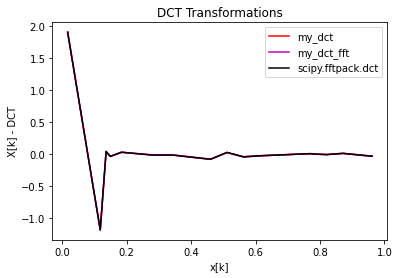

In [183]:
A = my_dct(x)
B = my_dct_fft(x)
C = dct(x, norm='ortho')

my_dct_err = np.mean(np.square(A-C))
my_dct_fft_err = np.mean(np.square(B-C))

print('       my_dct_err = {:.4}'.format(my_dct_err))
print('       my_dct_fft_err = {:.4}\n'.format(my_dct_fft_err))

plt.figure()
plt.plot(x,A, 'r', label='my_dct')
plt.plot(x,B, 'm', label='my_dct_fft')
plt.plot(x,C, 'k', label='scipy.fftpack.dct')
plt.title('DCT Transformations')
plt.xlabel('x[k]')
plt.ylabel('X[k] - DCT')
plt.legend()
plt.show()

In [190]:
D = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])
M,N = D.shape
P = np.indices(D.shape)
Pt = np.indices(D.T.shape)
idx = P.reshape(2, -1).T
idxT = Pt.reshape(2, -1).T


SyntaxError: ignored

In [211]:
def zigzag(M,N):
  x = np.arange(M*N).reshape(M,N)
  order = np.concatenate([np.diagonal(x[::-1,:], i)[::(2*(i % 2)-1)] 
                          for i in range(1-x.shape[0], x.shape[0]+1)])
  return order


In [213]:
zigzag(3,4)

array([ 0,  4,  1,  2,  5,  8,  9,  6,  3,  7, 10, 11])

In [214]:
zigzag(4,4)

array([ 0,  1,  4,  8,  5,  2,  3,  6,  9, 12, 13, 10,  7, 11, 14, 15])

In [215]:
zigzag(8,8)

array([ 0,  1,  8, 16,  9,  2,  3, 10, 17, 24, 32, 25, 18, 11,  4,  5, 12,
       19, 26, 33, 40, 48, 41, 34, 27, 20, 13,  6,  7, 14, 21, 28, 35, 42,
       49, 56, 57, 50, 43, 36, 29, 22, 15, 23, 30, 37, 44, 51, 58, 59, 52,
       45, 38, 31, 39, 46, 53, 60, 61, 54, 47, 55, 62, 63])

In [216]:
zigzag(16,16)

array([  0,   1,  16,  32,  17,   2,   3,  18,  33,  48,  64,  49,  34,
        19,   4,   5,  20,  35,  50,  65,  80,  96,  81,  66,  51,  36,
        21,   6,   7,  22,  37,  52,  67,  82,  97, 112, 128, 113,  98,
        83,  68,  53,  38,  23,   8,   9,  24,  39,  54,  69,  84,  99,
       114, 129, 144, 160, 145, 130, 115, 100,  85,  70,  55,  40,  25,
        10,  11,  26,  41,  56,  71,  86, 101, 116, 131, 146, 161, 176,
       192, 177, 162, 147, 132, 117, 102,  87,  72,  57,  42,  27,  12,
        13,  28,  43,  58,  73,  88, 103, 118, 133, 148, 163, 178, 193,
       208, 224, 209, 194, 179, 164, 149, 134, 119, 104,  89,  74,  59,
        44,  29,  14,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150,
       165, 180, 195, 210, 225, 240, 241, 226, 211, 196, 181, 166, 151,
       136, 121, 106,  91,  76,  61,  46,  31,  47,  62,  77,  92, 107,
       122, 137, 152, 167, 182, 197, 212, 227, 242, 243, 228, 213, 198,
       183, 168, 153, 138, 123, 108,  93,  78,  63,  79,  94, 10